In [4]:
import numpy as np
import matplotlib.pyplot as plt

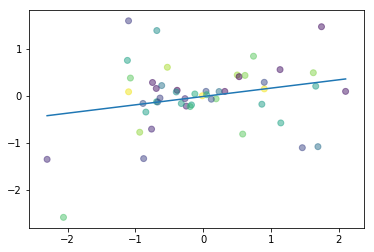

In [5]:
np.random.seed(1)
n=50
x=np.random.randn(n)
y=x*np.random.randn(n)

colors=np.random.rand(n)
plt.plot(np.unique(x),np.poly1d(np.polyfit(x,y,1))(np.unique(x)))
plt.scatter(x,y,c=colors,alpha=0.5)
plt.show()

In [6]:
#prepare dummy dataset
x_arr=[i for i in range(11)]
print x_arr

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [7]:
#convert to numpy
x=np.array(x_arr, dtype=np.float32)
print x
print x.shape

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
(11,)


In [8]:
#convert the 1d array to 2d
x=x.reshape(-1,1)
print x
print x.shape

[[  0.]
 [  1.]
 [  2.]
 [  3.]
 [  4.]
 [  5.]
 [  6.]
 [  7.]
 [  8.]
 [  9.]
 [ 10.]]
(11, 1)


In [9]:
#prepare the corresponding output Equation is y=2x+1
y_arr=[2*i+1 for i in x_arr]
print y_arr

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]


In [10]:
y=np.array(y_arr,dtype=np.float32)
print y

[  1.   3.   5.   7.   9.  11.  13.  15.  17.  19.  21.]


In [11]:
y=y.reshape(-1,1)
print y
print y.shape

[[  1.]
 [  3.]
 [  5.]
 [  7.]
 [  9.]
 [ 11.]
 [ 13.]
 [ 15.]
 [ 17.]
 [ 19.]
 [ 21.]]
(11, 1)


### Build the neural network

In [12]:
import torch
from torch.autograd import Variable
import torch.nn as nn

In [13]:
#create the class and model for the network
class LinearRegressionModel(nn.Module):
    def __init__(self,insize,ousize):
        super(LinearRegressionModel, self).__init__()
        self.linear=nn.Linear(inp_dim,out_dim)
    def forward(self, x):
        out=self.linear(x)
        return out

In [14]:
#initiate the inp and out and their dim
inp_dim=1
out_dim=1

model=LinearRegressionModel(inp_dim,out_dim)

In [15]:
#intiate the loss the loss here is mean square error that is MSE
criterion = nn.MSELoss()

In [16]:
learning_rate=0.01
optimizer= torch.optim.SGD(model.parameters(),lr=learning_rate)

In [17]:
epochs=100

In [49]:
for epoch in range(epochs):
    epoch+=1
    
    inputs=Variable(torch.from_numpy(x))
    labels=Variable(torch.from_numpy(y))
    
    optimizer.zero_grad()
    
    outputs = model(inputs)
    #print outputs.data.numpy()
    #print inputs.data.numpy()
    loss=criterion(outputs,labels)
    
    loss.backward()
    
    optimizer.step()
    
    print ('epoch {}, loss {}'.format(epoch,loss.data[0]))
'''    
    if epoch % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(inputs.data.numpy(), labels.data.numpy())
        plt.plot(inputs.data.numpy(), outputs.data.numpy(), 'r-', lw=0.5)
        plt.text(0.1, 0, 'Loss=%.4f' % loss.data[0], fontdict={'size': 10, 'color':  'red'})
        plt.show()
        plt.pause(0.1)
'''

epoch 1, loss 1.55935056534e-11
epoch 2, loss 1.55935056534e-11
epoch 3, loss 1.55935056534e-11
epoch 4, loss 1.55935056534e-11
epoch 5, loss 1.55935056534e-11
epoch 6, loss 1.55935056534e-11
epoch 7, loss 1.55935056534e-11
epoch 8, loss 1.55935056534e-11
epoch 9, loss 1.55935056534e-11
epoch 10, loss 1.55935056534e-11
epoch 11, loss 1.55935056534e-11
epoch 12, loss 1.55935056534e-11
epoch 13, loss 1.55935056534e-11
epoch 14, loss 1.55935056534e-11
epoch 15, loss 1.55935056534e-11
epoch 16, loss 1.55935056534e-11
epoch 17, loss 1.55935056534e-11
epoch 18, loss 1.55935056534e-11
epoch 19, loss 1.55935056534e-11
epoch 20, loss 1.55935056534e-11
epoch 21, loss 1.55935056534e-11
epoch 22, loss 1.55935056534e-11
epoch 23, loss 1.55935056534e-11
epoch 24, loss 1.55935056534e-11
epoch 25, loss 1.55935056534e-11
epoch 26, loss 1.55935056534e-11
epoch 27, loss 1.55935056534e-11
epoch 28, loss 1.55935056534e-11
epoch 29, loss 1.55935056534e-11
epoch 30, loss 1.55935056534e-11
epoch 31, loss 1.55

"    \n    if epoch % 5 == 0:\n        # plot and show learning process\n        plt.cla()\n        plt.scatter(inputs.data.numpy(), labels.data.numpy())\n        plt.plot(inputs.data.numpy(), outputs.data.numpy(), 'r-', lw=0.5)\n        plt.text(0.1, 0, 'Loss=%.4f' % loss.data[0], fontdict={'size': 10, 'color':  'red'})\n        plt.show()\n        plt.pause(0.1)\n"

In [50]:
#compare model
predicted = model(Variable(torch.from_numpy(x))).data.numpy()
predicted

array([[  0.99999267],
       [  2.9999938 ],
       [  4.99999523],
       [  6.99999666],
       [  8.99999714],
       [ 10.99999809],
       [ 13.        ],
       [ 15.00000095],
       [ 17.00000191],
       [ 19.00000381],
       [ 21.00000381]], dtype=float32)

In [51]:
y

array([[  1.],
       [  3.],
       [  5.],
       [  7.],
       [  9.],
       [ 11.],
       [ 13.],
       [ 15.],
       [ 17.],
       [ 19.],
       [ 21.]], dtype=float32)

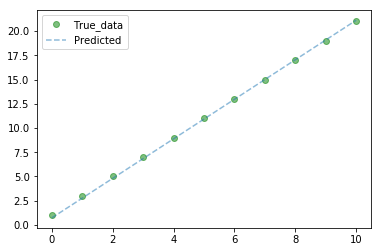

In [50]:
#predicted = model(Variable(torch.from_numpy(x))).data.numpy()
plt.clf()
plt.plot(x,y,'go',label='True_data',alpha=0.5)
plt.plot(x,predicted,'--',label='Predicted',alpha=0.5)
plt.legend(loc='best')
plt.show()